In [1]:
#a1
import numpy as np

def summation_unit(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

def step_activation(x):
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    return np.tanh(x)

def relu_activation(x):
    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):
    return x if x > 0 else alpha * x

def comparator(y_true, y_pred):
    return y_true - y_pred

# Example run
x = np.array([1, 0])
w = np.array([0.5, -0.3])
b = 0.1
z = summation_unit(x, w, b)
print("Step:", step_activation(z))
print("Bipolar Step:", bipolar_step_activation(z))
print("Sigmoid:", sigmoid_activation(z))
print("Tanh:", tanh_activation(z))
print("ReLU:", relu_activation(z))
print("Leaky ReLU:", leaky_relu_activation(z))


Step: 1
Bipolar Step: 1
Sigmoid: 0.6456563062257954
Tanh: 0.5370495669980352
ReLU: 0.6
Leaky ReLU: 0.6


Final Weights: [0.1  0.05]
Final Bias: -0.10000000000000765
Epochs: 130


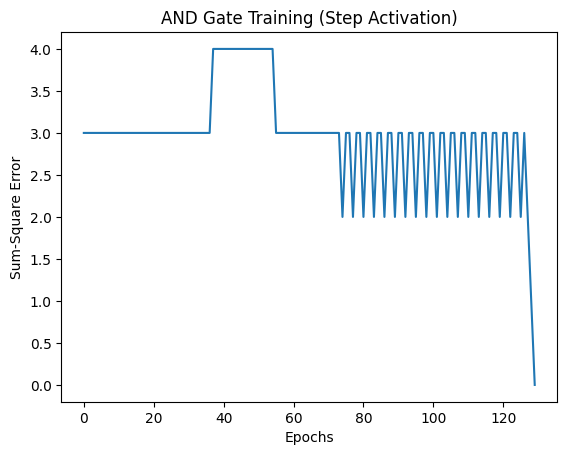

In [2]:
#a2
import numpy as np
import matplotlib.pyplot as plt

def step_activation(x):
    return 1 if x >= 0 else 0

def perceptron_train_and_gate(epochs=1000, lr=0.05):
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    Y = np.array([0,0,0,1])
    w = np.array([0.2, -0.75])
    b = 10
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            summation = np.dot(X[i], w) + b
            y_pred = step_activation(summation)
            error = Y[i] - y_pred
            w = w + lr * error * X[i]
            b = b + lr * error
            total_error += error**2
        errors.append(total_error)
        if total_error <= 0.002:
            break
    return w, b, errors

w, b, errors = perceptron_train_and_gate()
print("Final Weights:", w)
print("Final Bias:", b)
print("Epochs:", len(errors))

plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Square Error")
plt.title("AND Gate Training (Step Activation)")
plt.show()


Bipolar Step - Epochs: 1000
Sigmoid - Epochs: 130
ReLU - Epochs: 130


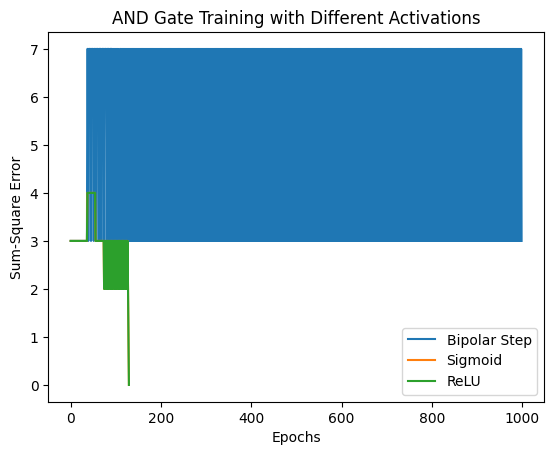

In [5]:
#a3
import numpy as np
import matplotlib.pyplot as plt

def bipolar_step(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

def perceptron_train(X, Y, activation, epochs=1000, lr=0.05, w_init=None, b_init=None):
    if w_init is None:
        w = np.array([0.2, -0.75])
    else:
        w = np.array(w_init)
    if b_init is None:
        b = 10
    else:
        b = b_init
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            summation = np.dot(X[i], w) + b
            if activation == "bipolar":
                y_pred = bipolar_step(summation)
            elif activation == "sigmoid":
                y_pred = 1 if sigmoid(summation) >= 0.5 else 0
            elif activation == "relu":
                y_pred = 1 if relu(summation) > 0 else 0
            error = Y[i] - y_pred
            w = w + lr * error * X[i]
            b = b + lr * error
            total_error += error**2
        errors.append(total_error)
        if total_error <= 0.002:
            break
    return w, b, errors

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,0,0,1])

w_bipolar, b_bipolar, errors_bipolar = perceptron_train(X, Y, "bipolar")
w_sigmoid, b_sigmoid, errors_sigmoid = perceptron_train(X, Y, "sigmoid")
w_relu, b_relu, errors_relu = perceptron_train(X, Y, "relu")

print("Bipolar Step - Epochs:", len(errors_bipolar))
print("Sigmoid - Epochs:", len(errors_sigmoid))
print("ReLU - Epochs:", len(errors_relu))

plt.plot(errors_bipolar, label="Bipolar Step")
plt.plot(errors_sigmoid, label="Sigmoid")
plt.plot(errors_relu, label="ReLU")
plt.xlabel("Epochs")
plt.ylabel("Sum-Square Error")
plt.title("AND Gate Training with Different Activations")
plt.legend()
plt.show()


Learning Rates: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Iterations: [68, 37, 23, 23, 19, 19, 15, 14, 13, 12]


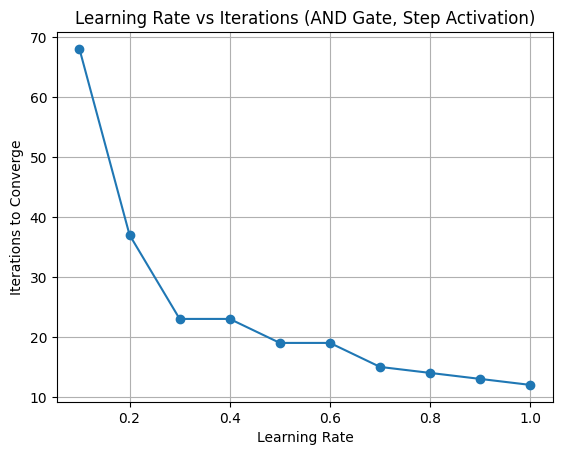

In [6]:
#a4
import numpy as np
import matplotlib.pyplot as plt

def step_activation(x):
    return 1 if x >= 0 else 0

def perceptron_and_lr(lr, epochs=1000):
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    Y = np.array([0,0,0,1])
    w = np.array([0.2, -0.75])
    b = 10
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            summation = np.dot(X[i], w) + b
            y_pred = step_activation(summation)
            error = Y[i] - y_pred
            w = w + lr * error * X[i]
            b = b + lr * error
            total_error += error**2
        if total_error <= 0.002:
            return epoch+1
    return epochs

learning_rates = np.arange(0.1, 1.1, 0.1)
iterations = []

for lr in learning_rates:
    iters = perceptron_and_lr(lr)
    iterations.append(iters)

print("Learning Rates:", learning_rates)
print("Iterations:", iterations)

plt.plot(learning_rates, iterations, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Iterations to Converge")
plt.title("Learning Rate vs Iterations (AND Gate, Step Activation)")
plt.grid(True)
plt.show()


In [7]:
#a8
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic classification dataset
X, y = make_classification(n_samples=200, n_features=5, n_informative=3, n_redundant=0, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# kNN + GridSearchCV
params = {'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train_scaled, y_train)

best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print("Best Parameters – kNN:", grid.best_params_)
print("Test Accuracy – kNN:", accuracy_score(y_test, y_pred_knn))


Best Parameters – kNN: {'n_neighbors': 7, 'weights': 'distance'}
Test Accuracy – kNN: 0.86


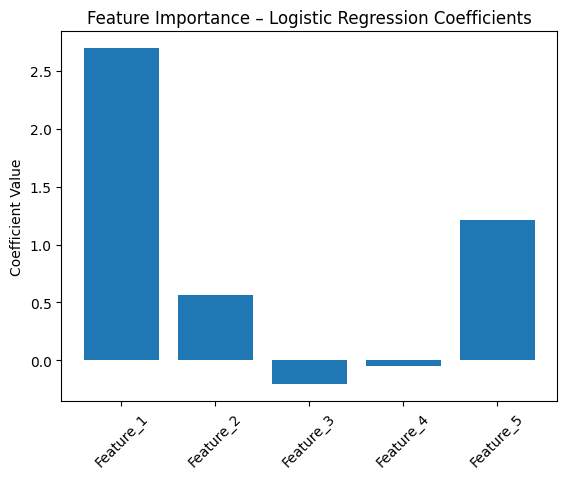

Feature_1: 2.6970
Feature_2: 0.5688
Feature_3: -0.2056
Feature_4: -0.0508
Feature_5: 1.2093


In [8]:
#a9
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Train Logistic Regression on same synthetic data
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Feature Importance (coefficients)
coefficients = log_model.coef_[0]
features = [f'Feature_{i+1}' for i in range(X.shape[1])]

plt.bar(features, coefficients)
plt.xticks(rotation=45)
plt.title("Feature Importance – Logistic Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.show()

# Print coefficients
for feat, coef in zip(features, coefficients):
    print(f"{feat}: {coef:.4f}")


In [9]:
#a10
import numpy as np

# Synthetic linear data
np.random.seed(42)
X_mb = np.random.rand(100) * 10
y_mb = 2.5 * X_mb + np.random.randn(100) * 2  # true slope = 2.5

theta = 0.0
lr = 0.01
batch_size = 10
epochs = 50

for epoch in range(epochs):
    for i in range(0, len(X_mb), batch_size):
        X_batch = X_mb[i:i+batch_size]
        y_batch = y_mb[i:i+batch_size]
        grad = -2 * np.sum((y_batch - theta * X_batch) * X_batch) / batch_size
        theta -= lr * grad

print(f"Estimated slope (theta) – Mini-batch GD: {theta:.2f}")


Estimated slope (theta) – Mini-batch GD: 2.55


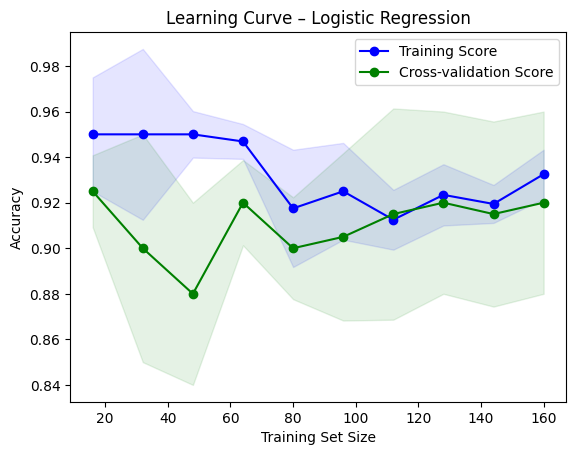

In [10]:
#a11
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Synthetic dataset
X, y = make_classification(n_samples=200, n_features=5, n_informative=3, n_redundant=0, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title("Learning Curve – Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [12]:
#load dataset 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("RFMiD_Training_Labels.csv")

# Automatically pick last column as target
target_column = df.columns[-1]

# Features and target
X = df.drop(columns=[target_column])
y = df[target_column]

print("Target column detected:", target_column)
print("Feature columns:", X.columns)

# Split dataset and scale features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Target column detected: CL
Feature columns: Index(['ID', 'Disease_Risk', 'DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN',
       'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST',
       'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS',
       'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF',
       'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED'],
      dtype='object')


C:\Users\Taduri Abhi Chakra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


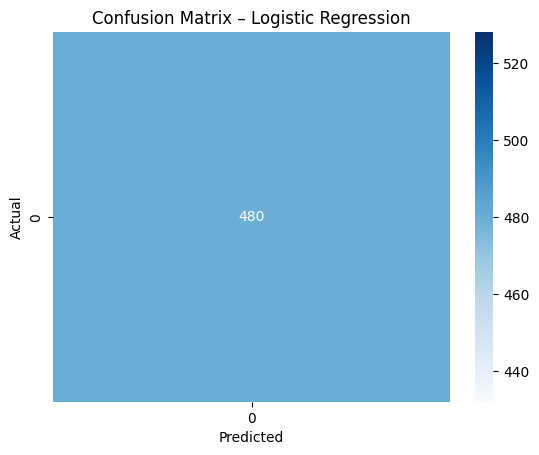

Classification Report – Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [17]:
#a6
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predict
y_pred = log_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report – Logistic Regression:")
print(classification_report(y_test, y_pred))


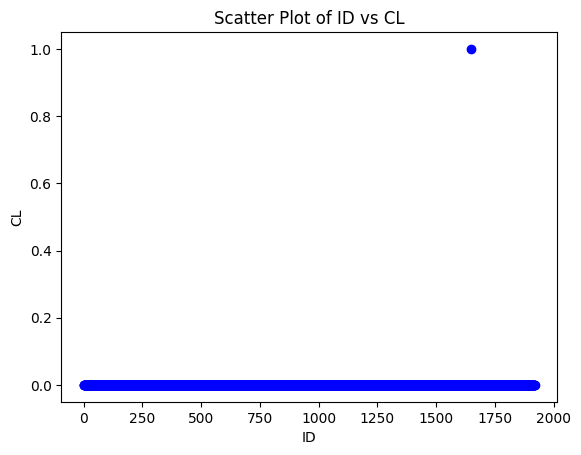

In [14]:
#a7
import matplotlib.pyplot as plt

feature = X.columns[0]  # first feature

plt.scatter(df[feature], df[target_column], color='blue')
plt.xlabel(feature)
plt.ylabel(target_column)
plt.title(f"Scatter Plot of {feature} vs {target_column}")
plt.show()


In [15]:
#a12
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
